# **STOCK PRICE PREDICTION USING LSTM**

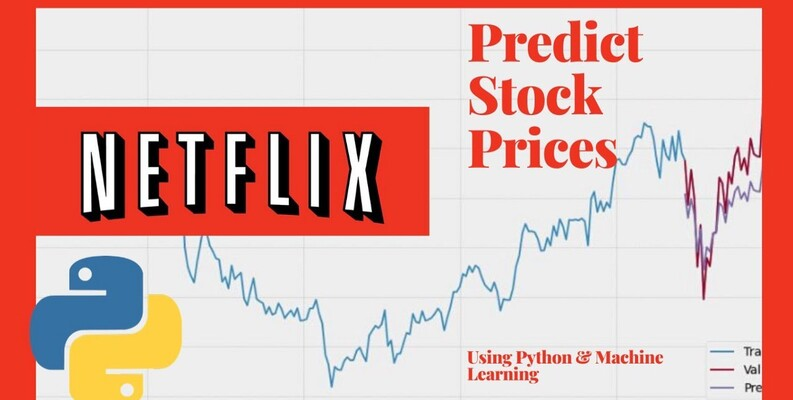

# **LOAD THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score


# **LOAD AND AUDIT THE DATA**

In [ ]:
df = pd.read_csv('/content/NFLX.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
#Converting the date column into datetime and result the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)

In [ ]:
df.shape

(1009, 6)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr().sort_values(by ='Close',ascending = False)

,Open,High,Low,Close,Adj Close,Volume
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


# **MODEL PROCESS**

In [ ]:
x = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state =42)

# **LOAD THE TENSORFLOW LIBRARIES**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


# **FUNCTIONAL**

In [ ]:
model = Sequential()

# **DECLARE THE LAYERS - LSTM**

In [ ]:
model.add(LSTM(128,return_sequences=True, input_shape = (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **COMPILE AND FIT THE MODEL**

In [ ]:
model.compile(optimizer='adam' ,loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1,epochs=30)

Epoch 1/30
807/807 [==============================] - 11s 8ms/step - loss: 44222.2188
Epoch 2/30
807/807 [==============================] - 5s 6ms/step - loss: 11230.5996
Epoch 3/30
807/807 [==============================] - 6s 8ms/step - loss: 1073.6757
Epoch 4/30
807/807 [==============================] - 5s 7ms/step - loss: 443.4113
Epoch 5/30
807/807 [==============================] - 5s 7ms/step - loss: 681.0073
Epoch 6/30
807/807 [==============================] - 5s 7ms/step - loss: 227.2433
Epoch 7/30
807/807 [==============================] - 5s 6ms/step - loss: 545.0316
Epoch 8/30
807/807 [==============================] - 6s 7ms/step - loss: 289.8297
Epoch 9/30
807/807 [==============================] - 5s 7ms/step - loss: 241.0618
Epoch 10/30
807/807 [==============================] - 6s 7ms/step - loss: 288.4932
Epoch 11/30
807/807 [==============================] - 5s 6ms/step - loss: 184.9564
Epoch 12/30
807/807 [==============================] - 5s 6ms/step - loss: 285.

In [ ]:
features = np.array([[401.970001, 427.700012, 398.200012, 20047500]])
model.predict(features)

1/1 [==============================] - 1s 869ms/step


array([[425.11502]], dtype=float32)

In [ ]:
preds = model.predict(xtest)

7/7 [==============================] - 0s 8ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,preds)
print("Mean Squared Error:", mse)

Mean Squared Error: 82.81931657253668
